In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('Election_Data.xlsx')   

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [5]:
df.describe(include='all')

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1525.000000,1525,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Labour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female
freq,NaN,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812
mean,763.000000,NaN,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295,NaN
std,440.373894,NaN,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315,NaN
min,1.000000,NaN,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN
25%,382.000000,NaN,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,NaN
50%,763.000000,NaN,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,NaN
75%,1144.000000,NaN,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,NaN


In [6]:
df['age'].mean()

54.18229508196721

In [7]:
df.vote.value_counts(1)

Labour          0.697049
Conservative    0.302951
Name: vote, dtype: float64

In [8]:
df.gender.value_counts(1)

female    0.532459
male      0.467541
Name: gender, dtype: float64

In [9]:
df.Blair.mode()

0    4
dtype: int64

In [10]:
df['Hague'].mode()

0    2
dtype: int64

In [11]:
df.shape

(1525, 10)

In [12]:
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [13]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)  

In [14]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [16]:
print(df.vote.unique())
print('\n')
print(df['age'].unique())
print('\n')
print(df['economic.cond.national'].unique())
print('\n')
print(df['economic.cond.household'].unique())
print('\n')
print(df['Blair'].unique())
print('\n')
print(df['Hague'].unique())
print('\n')
print(df['Europe'].unique())
print('\n')
print(df['political.knowledge'].unique())
print('\n')
print(df['gender'].unique())

['Labour' 'Conservative']


[43 36 35 24 41 47 57 77 39 70 66 59 51 79 37 38 53 44 60 56 61 55 62 76
 27 52 48 72 42 54 50 46 33 58 64 32 71 28 34 68 67 88 40 78 65 74 82 49
 84 81 45 69 31 63 89 83 29 92 73 75 26 90 25 80 30 86 85 87 93 91]


[3 4 2 1 5]


[3 4 2 1 5]


[4 5 2 1 3]


[1 4 2 5 3]


[ 2  5  3  4  6 11  1  7  9 10  8]


[2 0 3 1]


['female' 'male']


In [17]:
for feature in df.columns: 
    if df[feature].dtype == 'int64': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')

age
37    42
49    39
35    39
47    38
46    37
      ..
87     3
92     2
91     1
90     1
93     1
Name: age, Length: 70, dtype: int64


economic.cond.national
3    607
4    542
2    257
5     82
1     37
Name: economic.cond.national, dtype: int64


economic.cond.household
3    648
4    440
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64


Blair
4    836
2    438
5    153
1     97
3      1
Name: Blair, dtype: int64


Hague
2    624
4    558
1    233
5     73
3     37
Name: Hague, dtype: int64


Europe
11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: Europe, dtype: int64


political.knowledge
2    782
0    455
3    250
1     38
Name: political.knowledge, dtype: int64




In [18]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')

vote
Labour          1063
Conservative     462
Name: vote, dtype: int64


gender
female    812
male      713
Name: gender, dtype: int64




In [19]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups].head() 

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female


In [20]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Before (1525, 9)
After (1517, 9)
Number of duplicate rows = 0


<AxesSubplot:>

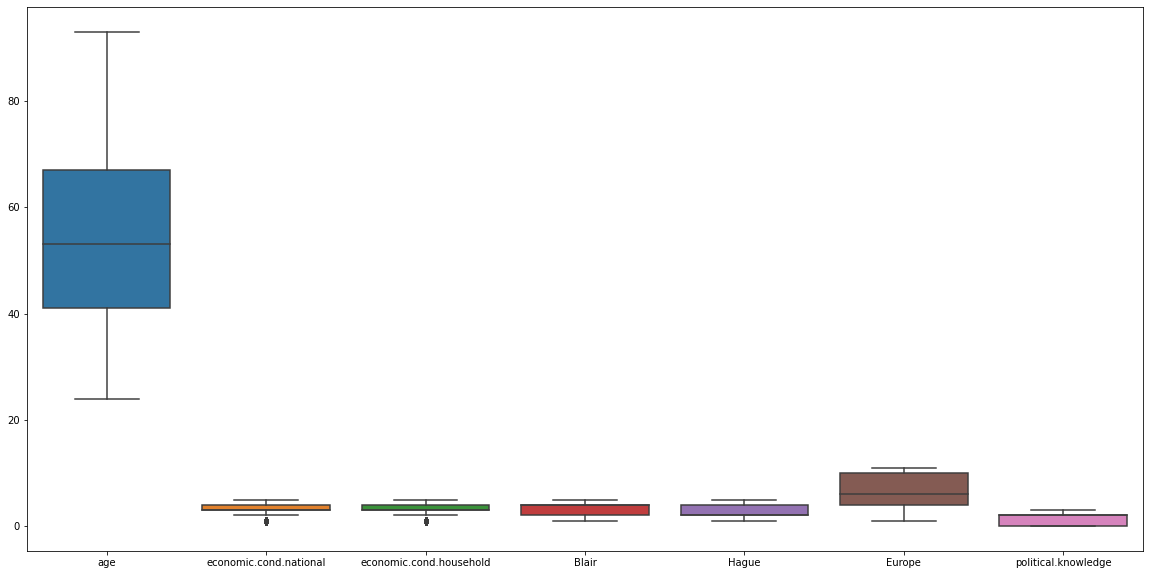

In [21]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df) 

<AxesSubplot:xlabel='economic.cond.national'>

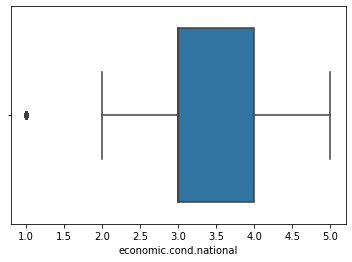

In [22]:
sns.boxplot(df['economic.cond.national']) 

<AxesSubplot:xlabel='economic.cond.household'>

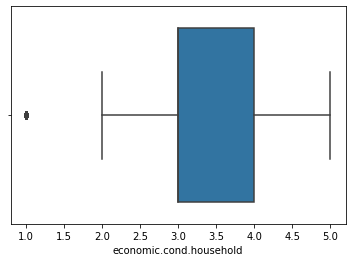

In [23]:
sns.boxplot(df['economic.cond.household'])

<AxesSubplot:xlabel='Blair', ylabel='count'>

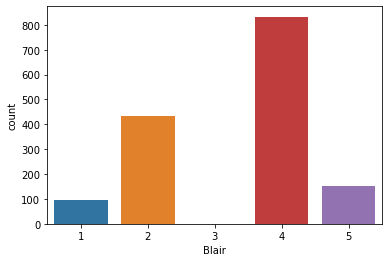

In [24]:
sns.countplot(df['Blair'])

<AxesSubplot:xlabel='Hague', ylabel='count'>

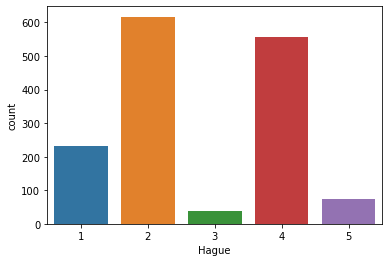

In [25]:
sns.countplot(df['Hague'])

<AxesSubplot:xlabel='age', ylabel='count'>

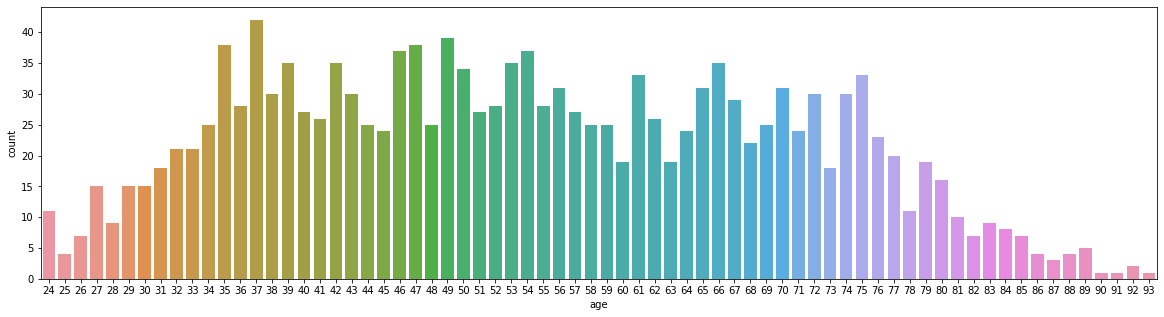

In [26]:
plt.figure(figsize=(20,5))
sns.countplot(df['age']) 

<AxesSubplot:xlabel='age', ylabel='count'>

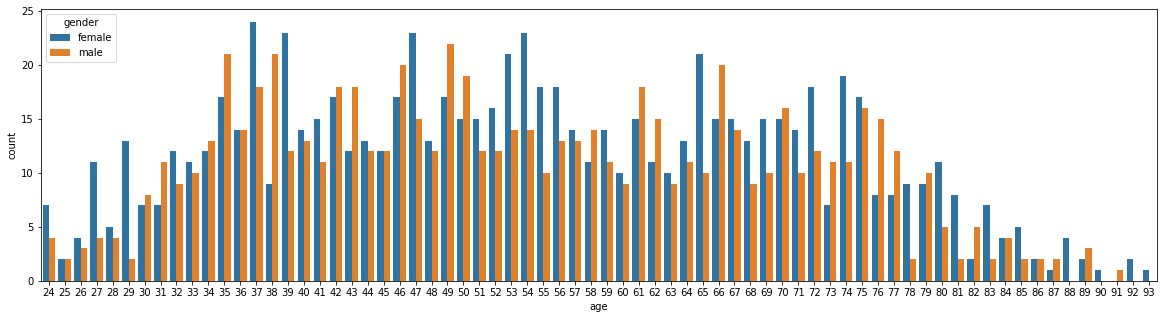

In [27]:
plt.figure(figsize=(20,5))
sns.countplot(df['age'],hue=df['gender']) 

<AxesSubplot:xlabel='Blair', ylabel='age'>

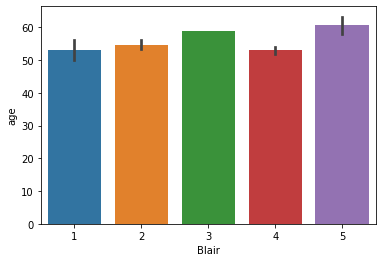

In [28]:
sns.barplot(df['Blair'],df['age'])

<AxesSubplot:xlabel='Hague', ylabel='age'>

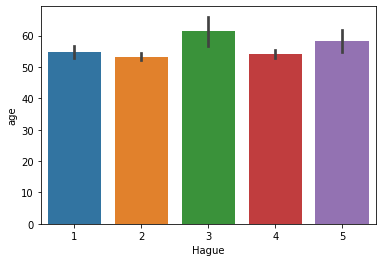

In [29]:
sns.barplot(df['Hague'],df['age'])

<AxesSubplot:xlabel='Blair', ylabel='age'>

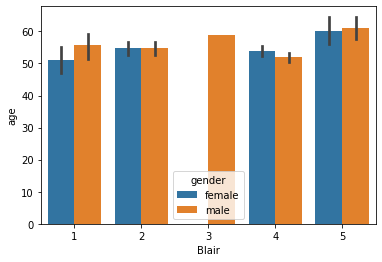

In [30]:
sns.barplot(x="Blair", y="age", hue="gender", data=df) 

<AxesSubplot:xlabel='Hague', ylabel='age'>

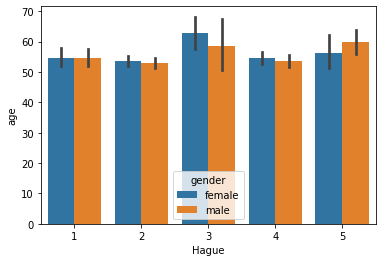

In [31]:
sns.barplot(x="Hague", y="age", hue="gender", data=df) 

<AxesSubplot:xlabel='vote', ylabel='count'>

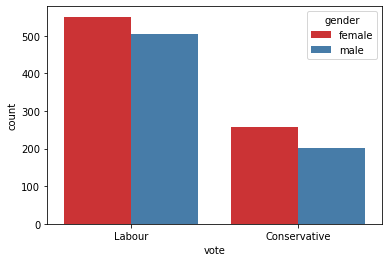

In [32]:
sns.countplot(x="vote", hue="gender",data=df,palette="Set1")

<AxesSubplot:xlabel='vote', ylabel='count'>

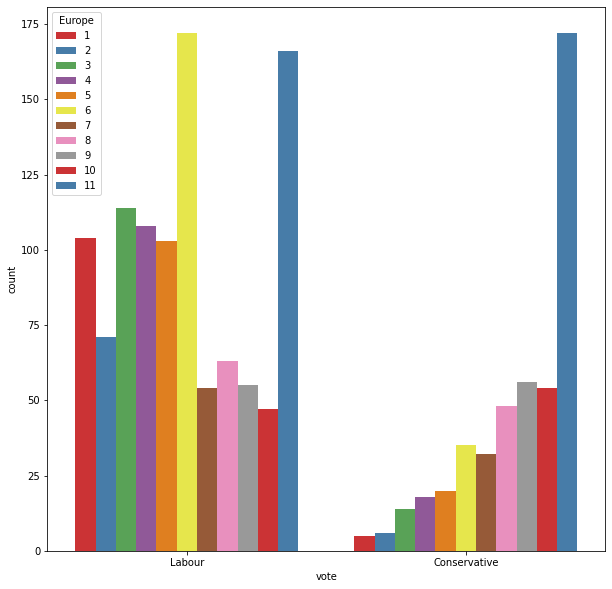

In [33]:
plt.figure(figsize=(10,10)) 
sns.countplot(x="vote", hue="Europe",data=df,palette="Set1")

<AxesSubplot:xlabel='Hague', ylabel='Europe'>

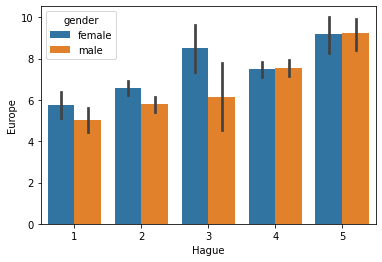

In [34]:
sns.barplot(x="Hague", y="Europe", hue="gender", data=df) 

<AxesSubplot:xlabel='Blair', ylabel='Europe'>

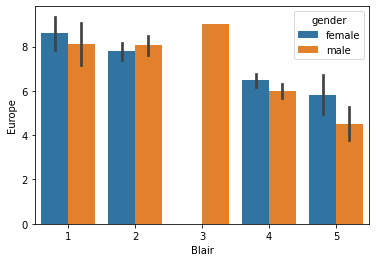

In [35]:
sns.barplot(x="Blair", y="Europe", hue="gender", data=df) 

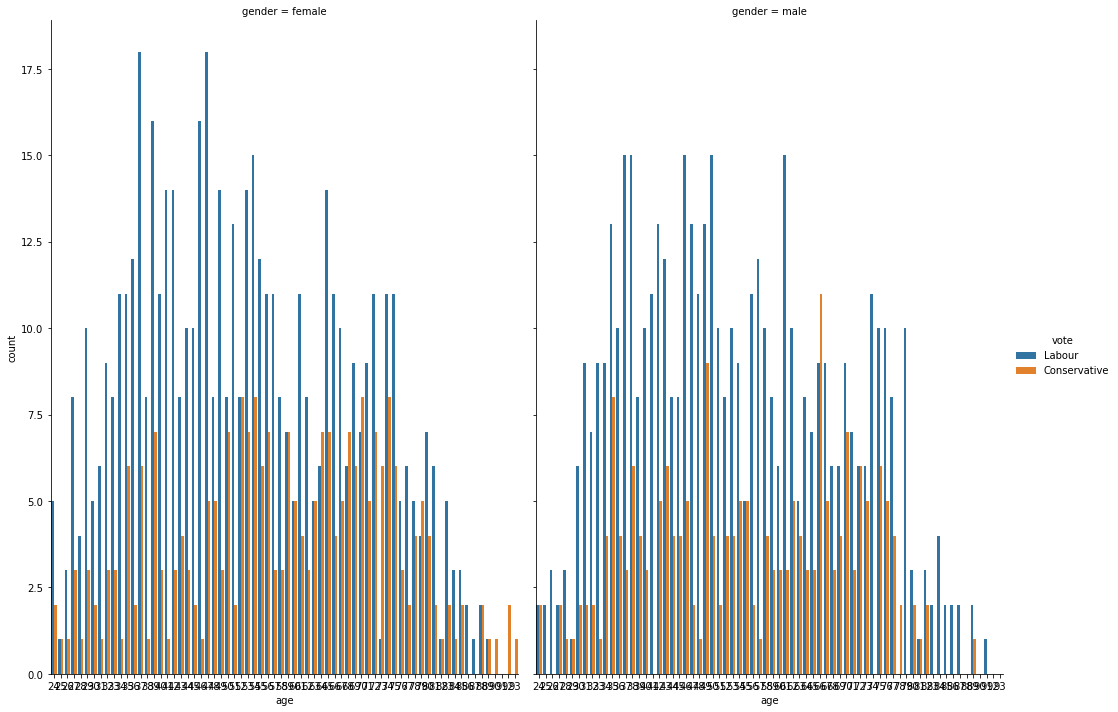

In [36]:
sns.catplot(x="age", hue="vote", col="gender",
                data=df, kind="count",
                height=10, aspect=.7);

<AxesSubplot:>

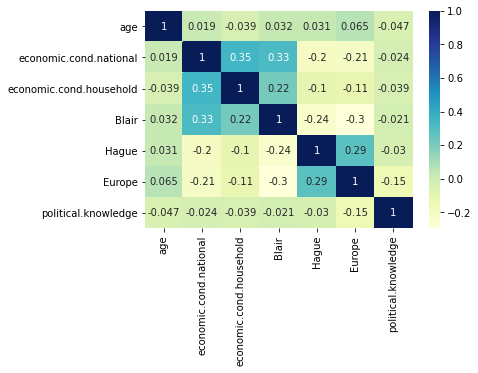

In [37]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')  

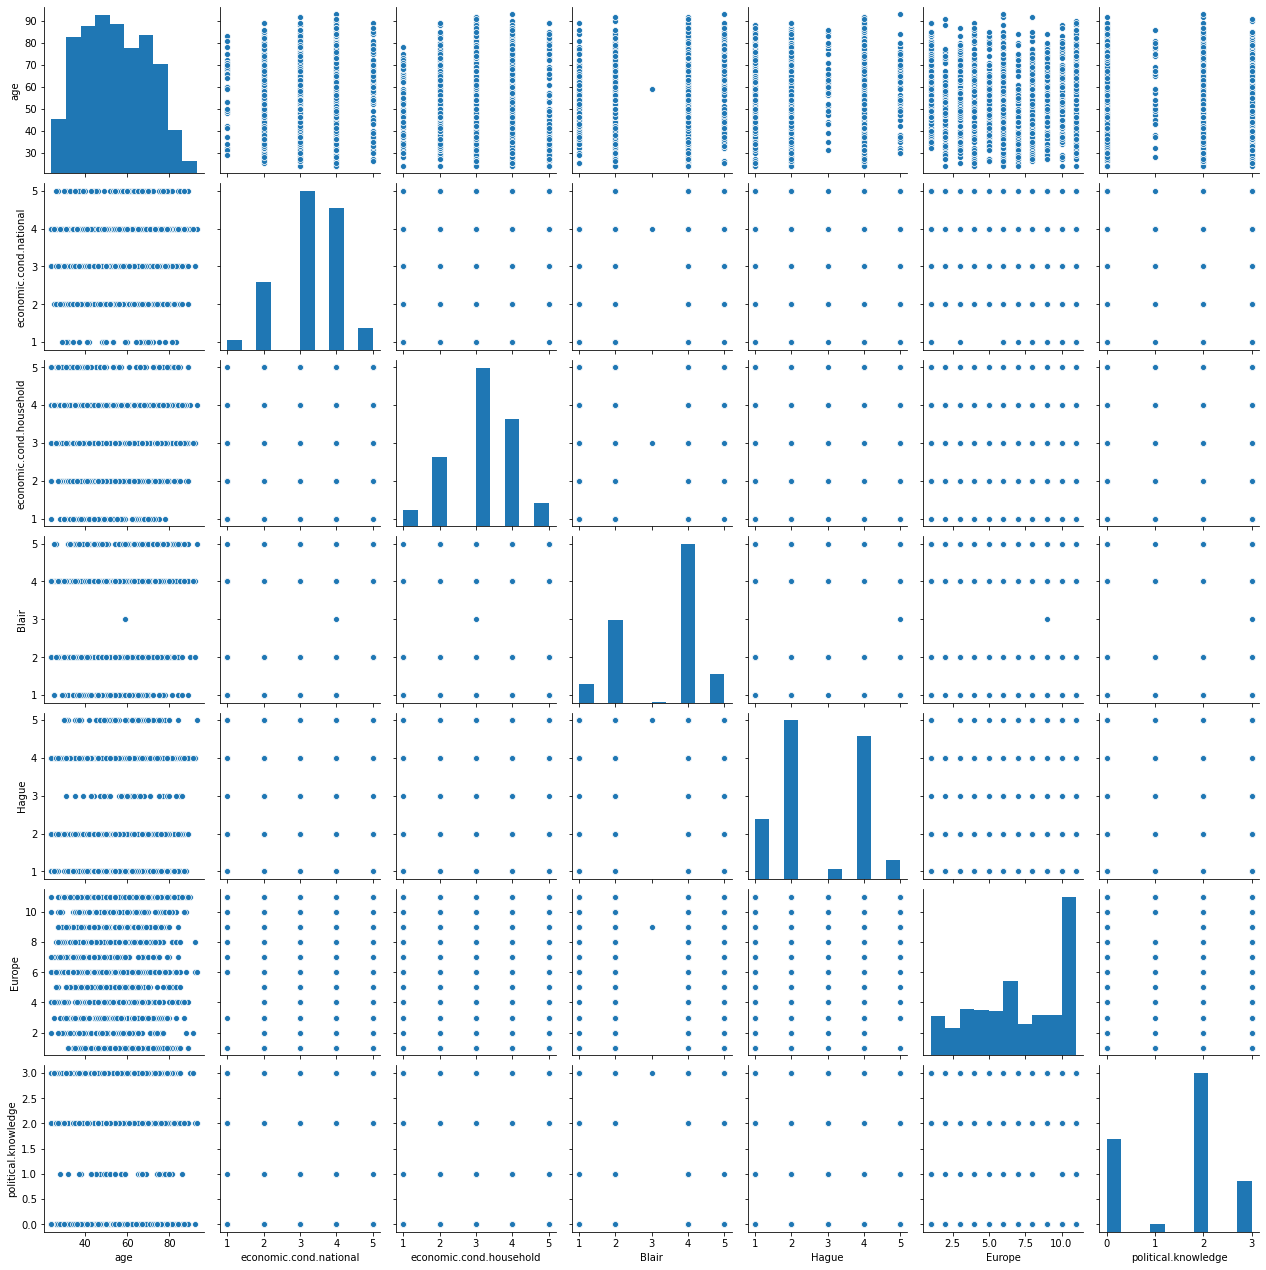

In [38]:
sns.pairplot(df)

In [39]:
df= pd.get_dummies(df, prefix=['Gender'], 
                        columns=['gender'],drop_first=True) 

In [40]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,Gender_male
0,Labour,43,3,3,4,1,2,2,0
1,Labour,36,4,4,4,4,5,2,1
2,Labour,35,4,4,5,2,3,2,1
3,Labour,24,4,2,2,1,4,0,0
4,Labour,41,2,2,1,1,6,2,1


In [41]:
df["economic.cond.household"] = df["economic.cond.household"].astype(str)
df["Blair"] = df["Blair"].astype(str)
df["Hague"] = df["Hague"].astype(str)
df["Europe"] = df["Europe"].astype(str)
df["political.knowledge"] = df["political.knowledge"].astype(str)
df["economic.cond.national"] = df["economic.cond.national"].astype(str)




In [42]:
df.dtypes

vote                       object
age                         int64
economic.cond.national     object
economic.cond.household    object
Blair                      object
Hague                      object
Europe                     object
political.knowledge        object
Gender_male                 uint8
dtype: object

In [43]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: vote
[Labour, Conservative]
Categories (2, object): [Conservative, Labour]
[1 0]


feature: economic.cond.national
[3, 4, 2, 1, 5]
Categories (5, object): [1, 2, 3, 4, 5]
[2 3 1 0 4]


feature: economic.cond.household
[3, 4, 2, 1, 5]
Categories (5, object): [1, 2, 3, 4, 5]
[2 3 1 0 4]


feature: Blair
[4, 5, 2, 1, 3]
Categories (5, object): [1, 2, 3, 4, 5]
[3 4 1 0 2]


feature: Hague
[1, 4, 2, 5, 3]
Categories (5, object): [1, 2, 3, 4, 5]
[0 3 1 4 2]


feature: Europe
[2, 5, 3, 4, 6, ..., 1, 7, 9, 10, 8]
Length: 11
Categories (11, object): [1, 10, 11, 2, ..., 6, 7, 8, 9]
[ 3  6  4  5  7  2  0  8 10  1  9]


feature: political.knowledge
[2, 0, 3, 1]
Categories (4, object): [0, 1, 2, 3]
[2 0 3 1]


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int8 
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int8 
 3   economic.cond.household  1517 non-null   int8 
 4   Blair                    1517 non-null   int8 
 5   Hague                    1517 non-null   int8 
 6   Europe                   1517 non-null   int8 
 7   political.knowledge      1517 non-null   int8 
 8   Gender_male              1517 non-null   uint8
dtypes: int64(1), int8(7), uint8(1)
memory usage: 75.6 KB


In [45]:
df1 = df.copy()

In [46]:
X = df.drop(['vote'], axis=1)
y = df[['vote']]

In [47]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()
minmax_scale

MinMaxScaler()

In [48]:
X['age'] = minmax_scale.fit_transform(X[['age']]) 

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [50]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (1061, 8)
X_test (456, 8)
y_train (1061, 1)
y_test (456, 1)


## Logistic Regression

81.71536286522148
[[182 125]
 [ 69 685]]
              precision    recall  f1-score   support

           0       0.73      0.59      0.65       307
           1       0.85      0.91      0.88       754

    accuracy                           0.82      1061
   macro avg       0.79      0.75      0.76      1061
weighted avg       0.81      0.82      0.81      1061



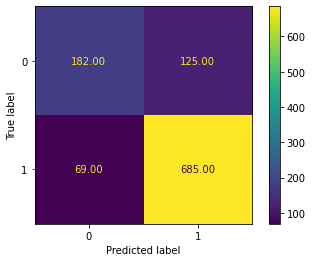

In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
ytrain_predict = model.predict(X_train)
model_score = model.score(X_train, y_train)*100
print(model_score)
print(metrics.confusion_matrix(y_train, ytrain_predict))
print(metrics.classification_report(y_train, ytrain_predict))
plot_confusion_matrix(model,X_train,y_train,values_format = '.2f');


79.16666666666666
[[ 94  59]
 [ 36 267]]
              precision    recall  f1-score   support

           0       0.72      0.61      0.66       153
           1       0.82      0.88      0.85       303

    accuracy                           0.79       456
   macro avg       0.77      0.75      0.76       456
weighted avg       0.79      0.79      0.79       456



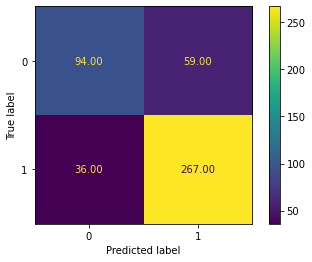

In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
ytest_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)*100
print(model_score)
print(metrics.confusion_matrix(y_test, ytest_predict))
print(metrics.classification_report(y_test, ytest_predict))
plot_confusion_matrix(model,X_test,y_test,values_format = '.2f');


In [53]:
logis_train_acc = model.score(X_train,y_train)
logis_train_acc

0.8171536286522149

In [54]:
logis_test_acc = model.score(X_test,y_test)
logis_test_acc

0.7916666666666666

In [55]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.464776,0.535224
1,0.131576,0.868424
2,0.017736,0.982264
3,0.864590,0.135410
4,0.067764,0.932236


AUC: 0.876


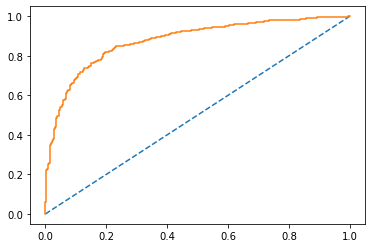

In [56]:
probs = model.predict_proba(X_train)
probs = probs[:, 1]
logis_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % logis_train_auc)
logis_train_fpr, logis_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logis_train_fpr, logis_train_tpr); 

AUC: 0.863


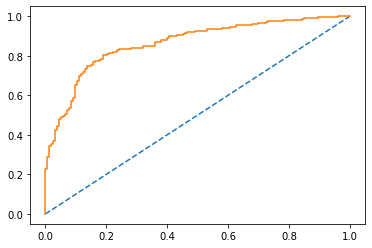

In [57]:
probs = model.predict_proba(X_test)
probs = probs[:, 1]
logis_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % logis_test_auc)
logis_test_fpr, logis_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logis_test_fpr, logis_test_tpr);

In [58]:
df1 = df.copy()

In [59]:
logis_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df1=pd.DataFrame(logis_metrics).transpose()
logis_train_precision=round(df1.loc["1"][0],2)
logis_train_recall=round(df1.loc["1"][1],2)
logis_train_f1=round(df1.loc["1"][2],2)
print ('logis_train_precision',logis_train_precision)
print ('logis_train_recall',logis_train_recall)
print ('logis_train_f1',logis_train_f1)

logis_train_precision 0.85
logis_train_recall 0.91
logis_train_f1 0.88


In [60]:
logis_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df1=pd.DataFrame(logis_metrics).transpose()
logis_test_precision=round(df1.loc["1"][0],2)
logis_test_recall=round(df1.loc["1"][1],2)
logis_test_f1=round(df1.loc["1"][2],2)
print ('logis_test_precision',logis_test_precision)
print ('logis_test_recall',logis_test_recall)
print ('logis_test_f1',logis_test_f1)

logis_test_precision 0.82
logis_test_recall 0.88
logis_test_f1 0.85


AUC for the Training Data: 0.876
AUC for the Test Data: 0.863


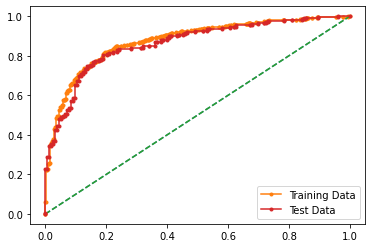

In [61]:
probs = model.predict_proba(X_train)
probs1 = model.predict_proba(X_test)
logis_train_auc = roc_auc_score(y_train,probs[:,1])
print('AUC for the Training Data: %.3f' % logis_train_auc)

logis_train_fpr,logis_train_tpr,thresholds = roc_curve(y_train, probs[:,1]) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(logis_train_fpr, logis_train_tpr, marker='.',label = 'Training Data')

logis_test_auc = roc_auc_score(y_test,probs1[:,1])
print('AUC for the Test Data: %.3f' % logis_test_auc)

logis_test_fpr, logis_test_tpr, thresholds = roc_curve(y_test, probs1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logis_test_fpr, logis_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### LDA

In [62]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [63]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [64]:
lda_train_acc = model.score(X_train,y_train)
lda_train_acc

0.819038642789821

In [65]:
lda_test_acc = model.score(X_test,y_test)
lda_test_acc

0.8004385964912281

In [66]:
confusion_matrix(y_train, ytrain_predict)

array([[191, 116],
       [ 76, 678]], dtype=int64)

              precision    recall  f1-score   support

           0       0.72      0.62      0.67       307
           1       0.85      0.90      0.88       754

    accuracy                           0.82      1061
   macro avg       0.78      0.76      0.77      1061
weighted avg       0.81      0.82      0.82      1061
 



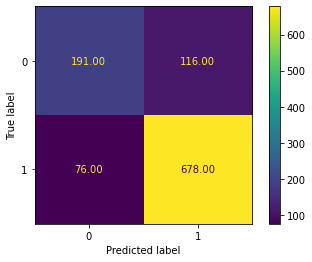

In [67]:
plot_confusion_matrix(model,X_train,y_train,values_format = '.2f')
print(classification_report(y_train, ytrain_predict),'\n');

In [68]:
confusion_matrix(y_test, ytest_predict)

array([[ 98,  55],
       [ 36, 267]], dtype=int64)

              precision    recall  f1-score   support

           0       0.73      0.64      0.68       153
           1       0.83      0.88      0.85       303

    accuracy                           0.80       456
   macro avg       0.78      0.76      0.77       456
weighted avg       0.80      0.80      0.80       456
 



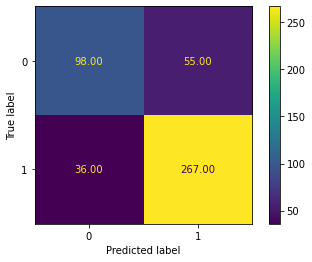

In [69]:
plot_confusion_matrix(model,X_test,y_test,values_format = '.2f')
print(classification_report(y_test, ytest_predict),'\n');

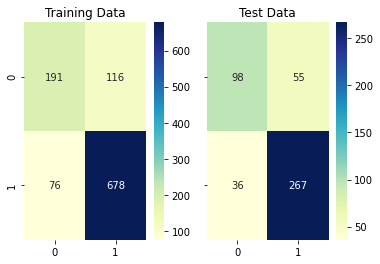

In [70]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [71]:
ytrain_prob = model.predict_proba(X_train)
ytest_prob = model.predict_proba(X_test)

In [72]:
pd.DataFrame(ytest_prob).head()

,0,1
0,0.486594,0.513406
1,0.100553,0.899447
2,0.016666,0.983334
3,0.879861,0.120139
4,0.052119,0.947881


AUC for the Training Data: 0.875
AUC for the Test Data: 0.868


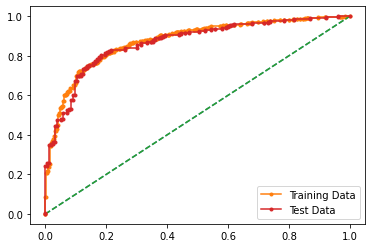

In [73]:
lda_train_auc = metrics.roc_auc_score(y_train,ytrain_prob[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc)

lda_train_fpr, lda_train_tpr, thresholds = metrics.roc_curve(y_train,ytrain_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(lda_train_fpr, lda_train_tpr, marker='.',label = 'Training Data')

lda_test_auc = metrics.roc_auc_score(y_test,ytest_prob[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc)

lda_test_fpr, lda_test_tpr, thresholds = metrics.roc_curve(y_test,ytest_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [74]:
lda_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df1=pd.DataFrame(lda_metrics).transpose()
lda_train_precision=round(df1.loc["1"][0],2)
lda_train_recall=round(df1.loc["1"][1],2)
lda_train_f1=round(df1.loc["1"][2],2)
print ('lda_train_precision',lda_train_precision)
print ('lda_train_recall',lda_train_recall)
print ('lda_train_f1',lda_train_f1)

lda_train_precision 0.85
lda_train_recall 0.9
lda_train_f1 0.88


In [75]:
lda_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df1=pd.DataFrame(lda_metrics).transpose()
lda_test_precision=round(df1.loc["1"][0],2)
lda_test_recall=round(df1.loc["1"][1],2)
lda_test_f1=round(df1.loc["1"][2],2)
print ('lda_test_precision',lda_test_precision)
print ('lda_test_recall',lda_test_recall)
print ('lda_test_f1',lda_test_f1)

lda_test_precision 0.83
lda_test_recall 0.88
lda_test_f1 0.85


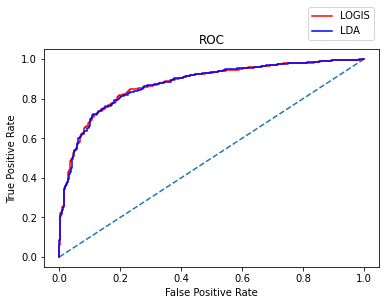

In [76]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logis_train_fpr, logis_train_tpr,color='red',label="LOGIS")
plt.plot(lda_train_fpr,lda_train_tpr,color='blue',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

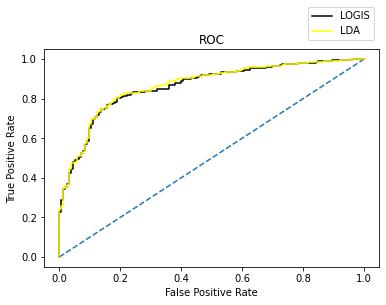

In [77]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logis_test_fpr, logis_test_tpr,color='black',label="LOGIS")
plt.plot(lda_test_fpr,lda_test_tpr,color='yellow',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

# KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier() 
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [79]:
ytrain_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, ytrain_predict))
print(metrics.classification_report(y_train, ytrain_predict))

0.8548539114043355
[[224  83]
 [ 71 683]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       307
           1       0.89      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.82      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [80]:
ytest_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, ytest_predict))
print(metrics.classification_report(y_test, ytest_predict))

0.7982456140350878
[[102  51]
 [ 41 262]]
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       153
           1       0.84      0.86      0.85       303

    accuracy                           0.80       456
   macro avg       0.78      0.77      0.77       456
weighted avg       0.80      0.80      0.80       456



In [81]:
KNN_train_acc = KNN_model.score(X_train, y_train)
KNN_train_acc

0.8548539114043355

In [82]:
KNN_test_acc = KNN_model.score(X_test, y_test)
KNN_test_acc

0.7982456140350878

In [83]:
ytrain_prob = KNN_model.predict_proba(X_train)
ytest_prob = KNN_model.predict_proba(X_test)

AUC for the Training Data: 0.928
AUC for the Test Data: 0.855


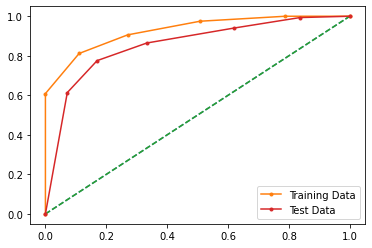

In [84]:
KNN_train_auc = roc_auc_score(y_train,ytrain_prob[:,1])
print('AUC for the Training Data: %.3f' % KNN_train_auc)

KNN_train_fpr, KNN_train_tpr, thresholds = roc_curve(y_train,ytrain_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(KNN_train_fpr, KNN_train_tpr, marker='.',label = 'Training Data')

KNN_test_auc = roc_auc_score(y_test,ytest_prob[:,1])
print('AUC for the Test Data: %.3f' % KNN_test_auc)

KNN_test_fpr, KNN_test_tpr, thresholds = roc_curve(y_test,ytest_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(KNN_test_fpr, KNN_test_tpr, marker='.',label='Test Data')
plt.legend(loc='best')
plt.show()

In [85]:
KNN_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df1=pd.DataFrame(KNN_metrics).transpose()
KNN_train_precision=round(df1.loc["1"][0],2)
KNN_train_recall=round(df1.loc["1"][1],2)
KNN_train_f1=round(df1.loc["1"][2],2)
print ('KNN_train_precision',KNN_train_precision)
print ('KNN_train_recall',KNN_train_recall)
print ('KNN_train_f1',KNN_train_f1)

KNN_train_precision 0.89
KNN_train_recall 0.91
KNN_train_f1 0.9


In [86]:
KNN_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df1=pd.DataFrame(KNN_metrics).transpose()
KNN_test_precision=round(df1.loc["1"][0],2)
KNN_test_recall=round(df1.loc["1"][1],2)
KNN_test_f1=round(df1.loc["1"][2],2)
print ('KNN_test_precision',KNN_test_precision)
print ('KNN_test_recall',KNN_test_recall)
print ('KNN_test_f1',KNN_test_f1)

KNN_test_precision 0.84
KNN_test_recall 0.86
KNN_test_f1 0.85


## NAIVEBASED 

In [87]:
from sklearn.naive_bayes import GaussianNB

In [88]:
NB_model = GaussianNB()
NB_model.fit(X_train,y_train)

GaussianNB()

In [89]:
ytrain_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      
print(model_score)
print(metrics.confusion_matrix(y_train, ytrain_predict))          
print(metrics.classification_report(y_train, ytrain_predict))

0.8162111215834119
[[192 115]
 [ 80 674]]
              precision    recall  f1-score   support

           0       0.71      0.63      0.66       307
           1       0.85      0.89      0.87       754

    accuracy                           0.82      1061
   macro avg       0.78      0.76      0.77      1061
weighted avg       0.81      0.82      0.81      1061



In [90]:
ytest_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                      
print(model_score)
print(metrics.confusion_matrix(y_test, ytest_predict))         
print(metrics.classification_report(y_test, ytest_predict))

0.793859649122807
[[103  50]
 [ 44 259]]
              precision    recall  f1-score   support

           0       0.70      0.67      0.69       153
           1       0.84      0.85      0.85       303

    accuracy                           0.79       456
   macro avg       0.77      0.76      0.77       456
weighted avg       0.79      0.79      0.79       456



In [91]:
NAIVE_train_acc = NB_model.score(X_train, y_train)
NAIVE_train_acc

0.8162111215834119

In [92]:
NAIVE_test_acc = NB_model.score(X_test, y_test)
NAIVE_test_acc

0.793859649122807

In [93]:
ytrain_prob = NB_model.predict_proba(X_train)
ytest_prob = NB_model.predict_proba(X_test)

AUC for the Training Data: 0.875
AUC for the Test Data: 0.857


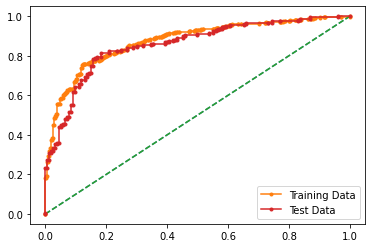

In [94]:
NAIVE_train_auc = roc_auc_score(y_train,ytrain_prob[:,1])
print('AUC for the Training Data: %.3f' % NAIVE_train_auc)

NAIVE_train_fpr, NAIVE_train_tpr, thresholds = roc_curve(y_train,ytrain_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(NAIVE_train_fpr, NAIVE_train_tpr, marker='.',label = 'Training Data')

NAIVE_test_auc = roc_auc_score(y_test,ytest_prob[:,1])
print('AUC for the Test Data: %.3f' % NAIVE_test_auc)

NAIVE_test_fpr, NAIVE_test_tpr, thresholds = roc_curve(y_test,ytest_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(NAIVE_test_fpr, NAIVE_test_tpr, marker='.',label='Test Data')
plt.legend(loc='best')
plt.show()

In [95]:
NAIVE_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df1=pd.DataFrame(NAIVE_metrics).transpose()
NAIVE_train_precision=round(df1.loc["1"][0],2)
NAIVE_train_recall=round(df1.loc["1"][1],2)
NAIVE_train_f1=round(df1.loc["1"][2],2)
print ('NAIVE_train_precision',NAIVE_train_precision)
print ('NAIVE_train_recall',NAIVE_train_recall)
print ('NAIVE_train_f1',NAIVE_train_f1)

NAIVE_train_precision 0.85
NAIVE_train_recall 0.89
NAIVE_train_f1 0.87


In [96]:
NAIVE_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df1=pd.DataFrame(NAIVE_metrics).transpose()
NAIVE_test_precision=round(df1.loc["1"][0],2)
NAIVE_test_recall=round(df1.loc["1"][1],2)
NAIVE_test_f1=round(df1.loc["1"][2],2)
print ('NAIVE_test_precision',NAIVE_test_precision)
print ('NAIVE_test_recall',NAIVE_test_recall)
print ('NAIVE_test_f1',NAIVE_test_f1)

NAIVE_test_precision 0.84
NAIVE_test_recall 0.85
NAIVE_test_f1 0.85


### BAGGING RANDOM FOREST

In [97]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [98]:
param_grid = {
    'max_depth': [2,5,7],
    'max_features': [2,5,7],
    'min_samples_leaf': [5,7],
    'min_samples_split': [25,30],
    'n_estimators': [250],
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [99]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [2, 5, 7], 'max_features': [2, 5, 7],
                         'min_samples_leaf': [5, 7],
                         'min_samples_split': [25, 30], 'n_estimators': [250]})

In [100]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 30,
 'n_estimators': 250}

In [101]:
best_grid = grid_search.best_estimator_

In [102]:
best_grid

RandomForestClassifier(max_depth=7, max_features=5, min_samples_leaf=5,
                       min_samples_split=30, n_estimators=250, random_state=1)

In [103]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
Bagging_model=BaggingClassifier(base_estimator=best_grid,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=7,
                                                        max_features=5,
                                                        min_samples_leaf=5,
                                                        min_samples_split=30,
                                                        n_estimators=250,
                                                        random_state=1),
                  n_estimators=100, random_state=1)

In [104]:
ytrain_predict = Bagging_model.predict(X_train)
model_score = Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, ytrain_predict))
print(metrics.classification_report(y_train, ytrain_predict))

0.8369462770970783
[[195 112]
 [ 61 693]]
              precision    recall  f1-score   support

           0       0.76      0.64      0.69       307
           1       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [105]:
ytest_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, ytest_predict))
print(metrics.classification_report(y_test, ytest_predict))

0.8114035087719298
[[ 99  54]
 [ 32 271]]
              precision    recall  f1-score   support

           0       0.76      0.65      0.70       153
           1       0.83      0.89      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.77      0.78       456
weighted avg       0.81      0.81      0.81       456



In [106]:
Bagging_train_acc = Bagging_model.score(X_train, y_train)
Bagging_train_acc

0.8369462770970783

In [107]:
Bagging_test_acc = Bagging_model.score(X_test, y_test)
Bagging_test_acc 

0.8114035087719298

In [108]:
ytrain_prob = Bagging_model.predict_proba(X_train)
ytest_prob = Bagging_model.predict_proba(X_test)

AUC for the Training Data: 0.910
AUC for the Test Data: 0.875


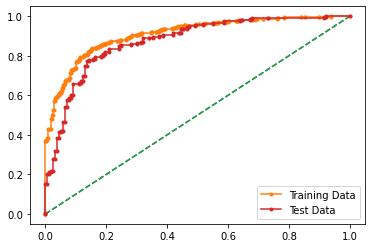

In [109]:
Bagging_train_auc = roc_auc_score(y_train,ytrain_prob[:,1])
print('AUC for the Training Data: %.3f' % Bagging_train_auc)

Bagging_train_fpr, Bagging_train_tpr, thresholds = roc_curve(y_train,ytrain_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(Bagging_train_fpr, Bagging_train_tpr, marker='.',label = 'Training Data')

Bagging_test_auc = roc_auc_score(y_test,ytest_prob[:,1])
print('AUC for the Test Data: %.3f' % Bagging_test_auc)

Bagging_test_fpr, Bagging_test_tpr, thresholds = roc_curve(y_test,ytest_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(Bagging_test_fpr, Bagging_test_tpr, marker='.',label='Test Data')
plt.legend(loc='best')
plt.show()

In [110]:
Bagging_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df1=pd.DataFrame(Bagging_metrics).transpose()
Bagging_train_precision=round(df1.loc["1"][0],2)
Bagging_train_recall=round(df1.loc["1"][1],2)
Bagging_train_f1=round(df1.loc["1"][2],2)
print ('Bagging_train_precision',Bagging_train_precision)
print ('Bagging_train_recall',Bagging_train_recall)
print ('Bagging_train_f1',Bagging_train_f1)

Bagging_train_precision 0.86
Bagging_train_recall 0.92
Bagging_train_f1 0.89


In [111]:
Bagging_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df1=pd.DataFrame(Bagging_metrics).transpose()
Bagging_test_precision=round(df1.loc["1"][0],2)
Bagging_test_recall=round(df1.loc["1"][1],2)
Bagging_test_f1=round(df1.loc["1"][2],2)
print ('Bagging_test_precision',Bagging_test_precision)
print ('Bagging_test_recall',Bagging_test_recall)
print ('Bagging_test_f1',Bagging_test_f1)

Bagging_test_precision 0.83
Bagging_test_recall 0.89
Bagging_test_f1 0.86


In [112]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                              Imp
Hague                    0.357886
Blair                    0.267366
Europe                   0.104371
economic.cond.national   0.100854
age                      0.090914
political.knowledge      0.039541
economic.cond.household  0.031199
Gender_male              0.007868


### BOOSTING

## ADA boost

In [113]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(base_estimator=None,n_estimators=200,algorithm='SAMME.R',learning_rate=1.0,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=200, random_state=1)

In [114]:
ytrain_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, ytrain_predict))
print(metrics.classification_report(y_train, ytrain_predict))

0.8567389255419415
[[218  89]
 [ 63 691]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       307
           1       0.89      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061



In [115]:
ytest_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, ytest_predict))
print(metrics.classification_report(y_test, ytest_predict))

0.8135964912280702
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



In [116]:
ada_train_acc = ADB_model.score(X_train, y_train)
ada_train_acc

0.8567389255419415

In [117]:
ada_test_acc = ADB_model.score(X_test, y_test)
ada_test_acc

0.8135964912280702

In [118]:
ytrain_prob = ADB_model.predict_proba(X_train)
ytest_prob = ADB_model.predict_proba(X_test)

AUC for the Training Data: 0.918
AUC for the Test Data: 0.875


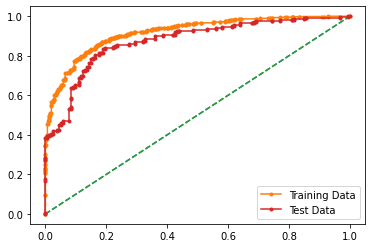

In [119]:
ada_train_auc = roc_auc_score(y_train,ytrain_prob[:,1])
print('AUC for the Training Data: %.3f' % ada_train_auc)

ada_train_fpr, ada_train_tpr, thresholds = roc_curve(y_train,ytrain_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(ada_train_fpr, ada_train_tpr, marker='.',label = 'Training Data')

ada_test_auc = roc_auc_score(y_test,ytest_prob[:,1])
print('AUC for the Test Data: %.3f' % ada_test_auc)

ada_test_fpr,ada_test_tpr, thresholds = roc_curve(y_test,ytest_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(ada_test_fpr, ada_test_tpr, marker='.',label='Test Data')
plt.legend(loc='best')
plt.show()

In [120]:
ada_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df1=pd.DataFrame(ada_metrics).transpose()
ada_train_precision=round(df1.loc["1"][0],2)
ada_train_recall=round(df1.loc["1"][1],2)
ada_train_f1=round(df1.loc["1"][2],2)
print ('ada_train_precision',ada_train_precision)
print ('ada_train_recall',ada_train_recall)
print ('ada_train_f1',ada_train_f1)

ada_train_precision 0.89
ada_train_recall 0.92
ada_train_f1 0.9


In [121]:
ada_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df1=pd.DataFrame(ada_metrics).transpose()
ada_test_precision=round(df1.loc["1"][0],2)
ada_test_recall=round(df1.loc["1"][1],2)
ada_test_f1=round(df1.loc["1"][2],2)
print ('ada_test_precision',ada_test_precision)
print ('ada_test_recall',ada_test_recall)
print ('ada_test_f1',ada_test_f1)

ada_test_precision 0.84
ada_test_recall 0.88
ada_test_f1 0.86


## Gradient Boosting

In [122]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [123]:
param_grid = {
    'max_depth': [2,5],
    'max_features': [2,5],
    'min_samples_leaf': [5,7],
    'min_samples_split': [30,60,90],
    'n_estimators': [50,100,250],
     'tol':[0.0001]
    
}

gbcl = GradientBoostingClassifier(random_state=1)

grid_search = GridSearchCV(estimator = gbcl, param_grid = param_grid, cv = 5)

In [124]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'max_depth': [2, 5], 'max_features': [2, 5],
                         'min_samples_leaf': [5, 7],
                         'min_samples_split': [30, 60, 90],
                         'n_estimators': [50, 100, 250], 'tol': [0.0001]})

In [125]:
grid_search.best_params_

{'max_depth': 2,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 60,
 'n_estimators': 100,
 'tol': 0.0001}

In [126]:
best_grid = grid_search.best_estimator_

In [127]:
best_grid

GradientBoostingClassifier(max_depth=2, max_features=2, min_samples_leaf=5,
                           min_samples_split=60, random_state=1)

In [128]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [129]:
best_grid.score(X_train,y_train)

0.8539114043355325

In [130]:
best_grid.score(X_test,y_test)

0.8245614035087719

In [131]:
ytrain_predict = best_grid.predict(X_train)
model_score = best_grid.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, ytrain_predict))
print(metrics.classification_report(y_train, ytrain_predict))

0.8539114043355325
[[207 100]
 [ 55 699]]
              precision    recall  f1-score   support

           0       0.79      0.67      0.73       307
           1       0.87      0.93      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [132]:
ytest_predict = best_grid.predict(X_test)
model_score = best_grid.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, ytest_predict))
print(metrics.classification_report(y_test, ytest_predict))

0.8245614035087719
[[105  48]
 [ 32 271]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.72       153
           1       0.85      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



In [133]:
gradient_train_acc = best_grid.score(X_train, y_train)
gradient_train_acc

0.8539114043355325

In [134]:
gradient_test_acc = best_grid.score(X_test, y_test)
gradient_test_acc

0.8245614035087719

In [135]:
ytrain_prob = best_grid.predict_proba(X_train)
ytest_prob = best_grid.predict_proba(X_test)

AUC for the Training Data: 0.915
AUC for the Test Data: 0.887


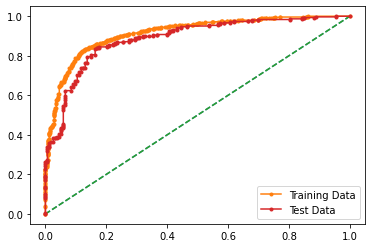

In [136]:
gradient_train_auc = roc_auc_score(y_train,ytrain_prob[:,1])
print('AUC for the Training Data: %.3f' % gradient_train_auc)

gradient_train_fpr, gradient_train_tpr, thresholds = roc_curve(y_train,ytrain_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(gradient_train_fpr, gradient_train_tpr, marker='.',label = 'Training Data')

gradient_test_auc = roc_auc_score(y_test,ytest_prob[:,1])
print('AUC for the Test Data: %.3f' % gradient_test_auc)

gradient_test_fpr,gradient_test_tpr, thresholds = roc_curve(y_test,ytest_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(gradient_test_fpr,gradient_test_tpr, marker='.',label='Test Data')
plt.legend(loc='best')
plt.show()

In [137]:
gradient_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df1=pd.DataFrame(gradient_metrics).transpose()
gradient_train_precision=round(df1.loc["1"][0],2)
gradient_train_recall=round(df1.loc["1"][1],2)
gradient_train_f1=round(df1.loc["1"][2],2)
print ('gradient_train_precision',gradient_train_precision)
print ('gradient_train_recall',gradient_train_recall)
print ('gradient_train_f1',gradient_train_f1)

gradient_train_precision 0.87
gradient_train_recall 0.93
gradient_train_f1 0.9


In [138]:
gradient_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df1=pd.DataFrame(ada_metrics).transpose()
gradient_test_precision=round(df1.loc["1"][0],2)
gradient_test_recall=round(df1.loc["1"][1],2)
gradient_test_f1=round(df1.loc["1"][2],2)
print ('gradient_test_precision',gradient_test_precision)
print ('gradient_test_recall',gradient_test_recall)
print ('gradient_test_f1',gradient_test_f1) 

gradient_test_precision 0.84
gradient_test_recall 0.88
gradient_test_f1 0.86


In [139]:
df1 = df.copy()

In [140]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LOGISTICS TRAIN':[logis_train_acc,logis_train_auc,logis_train_recall,logis_train_precision,logis_train_f1],
                     'LOGISTICS Test':[logis_test_acc,logis_test_auc,logis_test_recall,logis_test_precision,logis_test_f1],
                    'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
                    'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
                    'KNN TRAIN':[KNN_train_acc,KNN_train_auc,KNN_train_recall,KNN_train_precision,KNN_train_f1],
                    'KNN TEST':[KNN_test_acc,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1],
                    'NAIVE Train':[NAIVE_train_acc,NAIVE_train_auc,NAIVE_train_recall,NAIVE_train_precision,NAIVE_train_f1],
                    'NAIVE TEST':[NAIVE_test_acc,NAIVE_test_auc,NAIVE_test_recall,NAIVE_test_precision,NAIVE_test_f1],
                    'RF BAGGING TRAIN':[Bagging_train_acc,Bagging_train_auc,Bagging_train_recall,Bagging_train_precision,Bagging_train_f1],
                    'RF BAGGING TEST':[Bagging_test_acc,Bagging_test_auc,Bagging_test_recall,Bagging_test_precision,Bagging_test_f1],
                    'ADA TRAIN':[ada_train_acc,ada_train_auc,ada_train_recall,ada_train_precision,ada_train_f1],
                    'ADA TEST':[ada_test_acc,ada_test_auc,ada_test_recall,ada_test_precision,ada_test_f1],
                    'GRADIENT TRAIN':[gradient_train_acc,gradient_train_auc,gradient_train_recall,gradient_train_precision,gradient_train_f1],
                    'GRADIENT TEST':[gradient_test_acc,gradient_test_auc,gradient_test_recall,gradient_test_precision,gradient_test_f1]},index=index)
       
round(data,2) 

,LOGISTICS TRAIN,LOGISTICS Test,LDA Train,LDA Test,KNN TRAIN,KNN TEST,NAIVE Train,NAIVE TEST,RF BAGGING TRAIN,RF BAGGING TEST,ADA TRAIN,ADA TEST,GRADIENT TRAIN,GRADIENT TEST
Accuracy,0.82,0.79,0.82,0.80,0.85,0.80,0.82,0.79,0.84,0.81,0.86,0.81,0.85,0.82
AUC,0.88,0.86,0.88,0.87,0.93,0.86,0.88,0.86,0.91,0.87,0.92,0.87,0.92,0.89
Recall,0.91,0.88,0.90,0.88,0.91,0.86,0.89,0.85,0.92,0.89,0.92,0.88,0.93,0.88
Precision,0.85,0.82,0.85,0.83,0.89,0.84,0.85,0.84,0.86,0.83,0.89,0.84,0.87,0.84
F1 Score,0.88,0.85,0.88,0.85,0.90,0.85,0.87,0.85,0.89,0.86,0.90,0.86,0.90,0.86


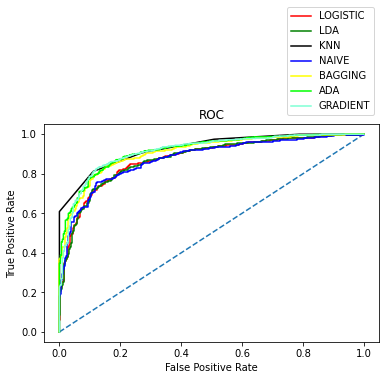

In [141]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logis_train_fpr, logis_train_tpr,color='red',label="LOGISTIC")
plt.plot(lda_train_fpr,lda_train_tpr,color='green',label="LDA")
plt.plot(KNN_train_fpr,KNN_train_tpr,color='black',label="KNN")
plt.plot(NAIVE_train_fpr,NAIVE_train_tpr,color='blue',label="NAIVE")
plt.plot(Bagging_train_fpr,Bagging_train_tpr,color='yellow',label="BAGGING")
plt.plot(ada_train_fpr,ada_train_tpr,color='lime',label="ADA")
plt.plot(gradient_train_fpr,gradient_train_tpr,color='aquamarine',label="GRADIENT")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right');

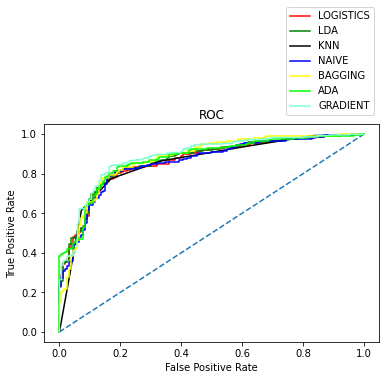

In [142]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logis_test_fpr, logis_test_tpr,color='red',label="LOGISTICS")
plt.plot(lda_test_fpr,lda_test_tpr,color='green',label="LDA")
plt.plot(KNN_test_fpr,KNN_test_tpr,color='black',label="KNN")
plt.plot(NAIVE_test_fpr, NAIVE_test_tpr,color='blue',label="NAIVE")
plt.plot(Bagging_test_fpr,Bagging_test_tpr,color='yellow',label="BAGGING")
plt.plot(ada_test_fpr,ada_test_tpr,color='lime',label="ADA")
plt.plot(gradient_test_fpr,gradient_test_tpr,color='aquamarine',label="GRADIENT")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right');